<a href="https://colab.research.google.com/github/VirtueZhao/Dive-into-Deep-Learning/blob/main/2_6_Probability.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import d2l as d2l
from torch.distributions import multinomial

In [4]:
fair_probs = torch.ones([6]) / 6
print(fair_probs)
multinomial.Multinomial(1, fair_probs).sample()

tensor([0.1667, 0.1667, 0.1667, 0.1667, 0.1667, 0.1667])


tensor([0., 0., 0., 0., 0., 1.])

In [5]:
multinomial.Multinomial(10, fair_probs).sample()

tensor([1., 3., 1., 4., 0., 1.])

In [6]:
counts = multinomial.Multinomial(1000, fair_probs).sample()
print(counts)
counts / 1000

tensor([148., 167., 163., 183., 163., 176.])


tensor([0.1480, 0.1670, 0.1630, 0.1830, 0.1630, 0.1760])

tensor([[2., 1., 2., 3., 1., 1.],
        [1., 1., 2., 2., 2., 2.],
        [0., 0., 3., 1., 4., 2.],
        ...,
        [2., 0., 0., 4., 0., 4.],
        [1., 3., 1., 3., 1., 1.],
        [0., 4., 1., 2., 3., 0.]])
tensor([[  2.,   1.,   2.,   3.,   1.,   1.],
        [  3.,   2.,   4.,   5.,   3.,   3.],
        [  3.,   2.,   7.,   6.,   7.,   5.],
        ...,
        [892., 792., 837., 815., 805., 839.],
        [893., 795., 838., 818., 806., 840.],
        [893., 799., 839., 820., 809., 840.]])


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 23454 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 39564 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 27425 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 25968 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 23454 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 39564 missing from current font.
  font.set_te

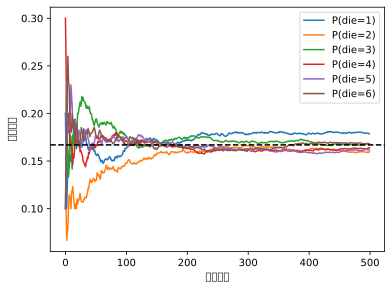

In [13]:
counts = multinomial.Multinomial(10, fair_probs).sample((500,))
print(counts)
cum_counts = counts.cumsum(dim=0)
print(cum_counts)
# print(cum_counts.sum(dim=1,keepdim=True))
estimates = cum_counts / cum_counts.sum(dim=1, keepdims=True)

d2l.set_figsize((6, 4.5))
for i in range(6):
  d2l.plt.plot(estimates[:,i].numpy(), label=("P(die=" + str(i+1)+")"))
d2l.plt.axhline(y=0.167,color='black',linestyle='dashed')
d2l.plt.gca().set_xlabel('实验次数')
d2l.plt.gca().set_ylabel('估算概率')
d2l.plt.legend()